In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


数据初始化

In [81]:
data = pd.read_csv('dataset.csv',header=None,names=['A','B','label'])
data = data.sample(frac=1).reset_index(drop=True)
train_data, test_data = train_test_split(data, test_size=0.1)

X_train = train_data[['A','B']].values;
Y_train = train_data['label'].values - 1;
X_test = test_data[['A','B']].values;
Y_test = test_data['label'].values - 1;

X_train_tensor = torch.FloatTensor(X_train) 
Y_train_tensor = torch.LongTensor(Y_train)  
X_test_tensor = torch.FloatTensor(X_test)    
Y_test_tensor = torch.LongTensor(Y_test) 


画图

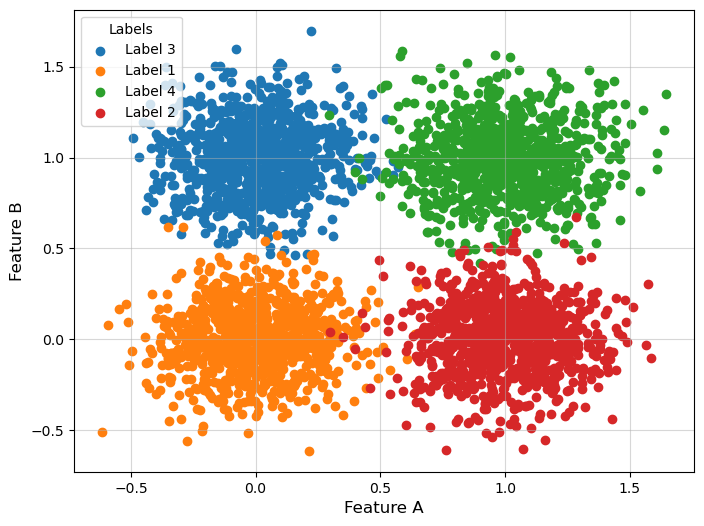

In [3]:
plt.figure(figsize=(8, 6))

for label in train_data['label'].unique():
    subset = train_data[train_data['label'] == label]
    plt.scatter(
        subset['A'],
        subset['B'],
        label=f"Label {label}",
    )
plt.xlabel("Feature A", fontsize=12)
plt.ylabel("Feature B", fontsize=12)
plt.legend(title="Labels")
plt.grid(alpha=0.5)
plt.show()


In [131]:
class FeedForwardNN(nn.Module): 
    def __init__(self, N_fc1, N_fc2, num_classes=4):  
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(2, N_fc1)
        self.fc2 = nn.Linear(N_fc1, N_fc2)
        self.fc3 = nn.Linear(N_fc2, num_classes) 
        
        # self.relu = nn.ReLU()
        # self.relu = nn.Sigmoid()
        self.relu = nn.Tanh()
        # self.relu = nn.LeakyReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) 
        return x
    
Neurons = [(16, 16), (64, 32), (64, 16), (128, 32), (128, 16)]

N_fc1, N_fc2 = Neurons[0]


In [132]:
model = FeedForwardNN(N_fc1, N_fc2, num_classes=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) 

num_epochs = 1000
for epoch in range(num_epochs):
    model.train() 
    optimizer.zero_grad() 
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor) 
    loss.backward() 
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval() 
with torch.no_grad(): 
    outputs = model(X_test_tensor) 
    _, predicted = torch.max(outputs, 1) 
    correct = (predicted == Y_test_tensor).sum().item() 
    accuracy = 100 * correct / Y_test_tensor.size(0)
    print(f'Accuracy: {accuracy:.2f}%')

Epoch [10/1000], Loss: 1.2510
Epoch [20/1000], Loss: 1.1967
Epoch [30/1000], Loss: 1.1390
Epoch [40/1000], Loss: 1.0768
Epoch [50/1000], Loss: 1.0103
Epoch [60/1000], Loss: 0.9403
Epoch [70/1000], Loss: 0.8682
Epoch [80/1000], Loss: 0.7955
Epoch [90/1000], Loss: 0.7238
Epoch [100/1000], Loss: 0.6545
Epoch [110/1000], Loss: 0.5888
Epoch [120/1000], Loss: 0.5279
Epoch [130/1000], Loss: 0.4724
Epoch [140/1000], Loss: 0.4229
Epoch [150/1000], Loss: 0.3792
Epoch [160/1000], Loss: 0.3412
Epoch [170/1000], Loss: 0.3082
Epoch [180/1000], Loss: 0.2797
Epoch [190/1000], Loss: 0.2551
Epoch [200/1000], Loss: 0.2338
Epoch [210/1000], Loss: 0.2153
Epoch [220/1000], Loss: 0.1991
Epoch [230/1000], Loss: 0.1850
Epoch [240/1000], Loss: 0.1725
Epoch [250/1000], Loss: 0.1616
Epoch [260/1000], Loss: 0.1518
Epoch [270/1000], Loss: 0.1431
Epoch [280/1000], Loss: 0.1353
Epoch [290/1000], Loss: 0.1283
Epoch [300/1000], Loss: 0.1219
Epoch [310/1000], Loss: 0.1162
Epoch [320/1000], Loss: 0.1110
Epoch [330/1000],